In [ ]:
# Step 1: Import Libraries
import tensorflow as tf


from tensorflow.keras import datasets, layers, models, preprocessing, callbacks
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Load and Preprocess Data
# Load IMDb dataset
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Pad sequences to ensure uniform input length
maxlen = 500
train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

In [ ]:
# Step 3: Build the RNN (LSTM) Model
model = models.Sequential()
model.add(layers.Embedding(10000, 128, input_length=maxlen))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 5: Train the Model
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_data, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_data, test_labels), callbacks=[early_stopping])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.7312 - loss: 0.5137 - val_accuracy: 0.7902 - val_loss: 0.4874
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.8882 - loss: 0.2912 - val_accuracy: 0.8515 - val_loss: 0.3646
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - accuracy: 0.9229 - loss: 0.2055 - val_accuracy: 0.8584 - val_loss: 0.4053
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.9493 - loss: 0.1402 - val_accuracy: 0.8584 - val_loss: 0.3533
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9610 - loss: 0.1105 - val_accuracy: 0.8636 - val_loss: 0.3663
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9692 - loss: 0.0890 - val_accuracy: 0.8610 - val_loss: 0.4388
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.9830 - loss: 0.0538 - val_accuracy: 0.8605 - val_loss: 0.5059


In [ ]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

782/782 - 11s - 15ms/step - accuracy: 0.8605 - loss: 0.5059

Test accuracy: 0.860480010509491


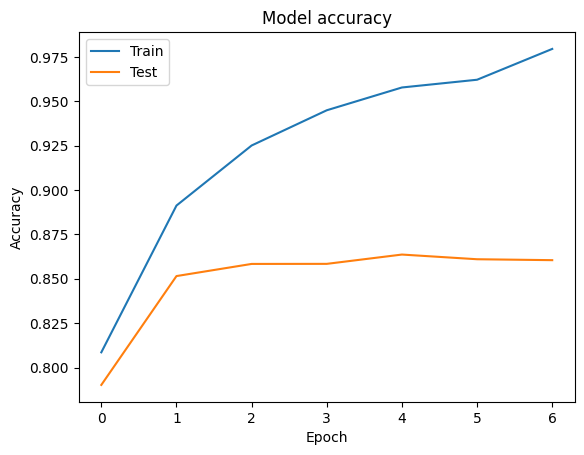

In [ ]:
# Step 7: Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

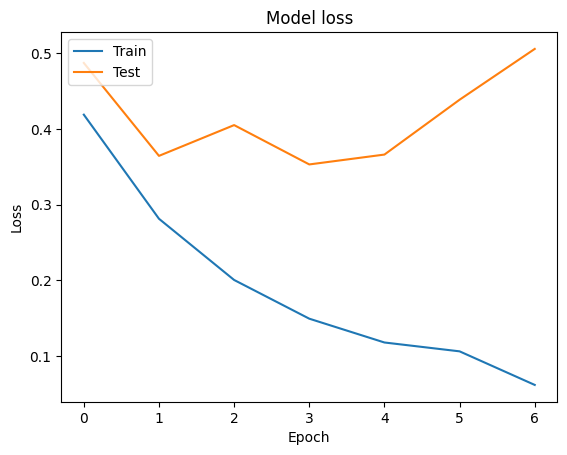

In [ ]:
# Step 8: Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
sample_review = "i enjoyed the movie"
sample_review_tokenized = tf.keras.preprocessing.text.text_to_word_sequence(sample_review)

# Get the word index from the IMDB dataset, handling words outside the vocabulary
word_index = imdb.get_word_index()
sample_review_encoded = [word_index.get(word, 0) for word in sample_review_tokenized]

# Pad the encoded review
maxlen = 100  # Ensure maxlen is the same as used in training
sample_review_padded = preprocessing.sequence.pad_sequences([sample_review_encoded], maxlen=maxlen)

# Make the prediction
prediction = model.predict(sample_review_padded)[0]

# Print the predicted sentiment
predicted_sentiment = "positive" if prediction > 0.5 else "negative"
print(f'Predicted sentiment: {predicted_sentiment}')

NameError: name 'imdb' is not defined

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.6884 - loss: 0.5632 - val_accuracy: 0.8462 - val_loss: 0.3592
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.8890 - loss: 0.2783 - val_accuracy: 0.8691 - val_loss: 0.3187
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8791 - loss: 0.2854 - val_accuracy: 0.7312 - val_loss: 0.5204
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.8067 - loss: 0.4229 - val_accuracy: 0.8436 - val_loss: 0.3809
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 64ms/step - accuracy: 0.8936 - loss: 0.2576 - val_accuracy: 0.8633 - val_loss: 0.3562
782/782 - 11s - 14ms/step - accuracy: 0.8633 - loss: 0.3562

Test accuracy: 0.863319993019104


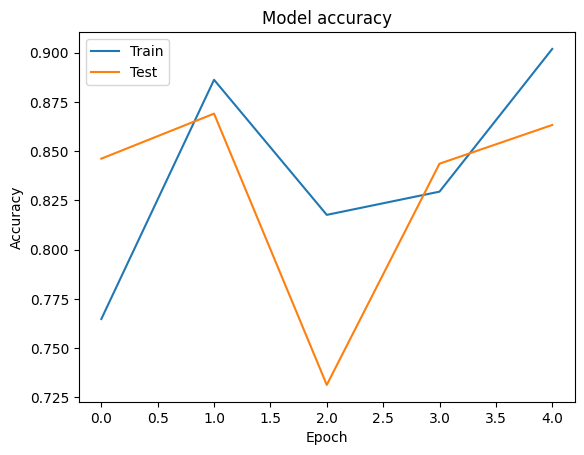

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted sentiment: negative


In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing, callbacks
import matplotlib.pyplot as plt

# Step 2: Load and Preprocess Data
# Load IMDb dataset
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input length
maxlen = 500
train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

# Step 3: Build the RNN (LSTM) Model
model = models.Sequential()
model.add(layers.Embedding(10000, 128, input_length=maxlen))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_data, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_data, test_labels), callbacks=[early_stopping])

# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Step 7: Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()




In [ ]:
# Step 3: Build the RNN (LSTM) Model with Dropout
model = models.Sequential()
model.add(layers.Embedding(10000, 128, input_length=maxlen))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.LSTM(128))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model with Early Stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_data, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_data, test_labels), callbacks=[early_stopping])

# Step 8: Predict sentiment for a user input review
# Get input review from the user
sample_review = input("Enter a movie review: ")

# Tokenize the review
sample_review_tokenized = tf.keras.preprocessing.text.text_to_word_sequence(sample_review)

# Get the word index from the IMDB dataset, handling words outside the vocabulary
word_index = datasets.imdb.get_word_index()

# IMDb reserves indices 0-3 for special tokens, so we add 3 to each word's index
sample_review_encoded = [word_index.get(word, 0) + 3 for word in sample_review_tokenized]

# Pad the encoded review to the same length used during training
sample_review_padded = preprocessing.sequence.pad_sequences([sample_review_encoded], maxlen=500)

# Make the prediction
prediction = model.predict(sample_review_padded)[0]

# Print the predicted sentiment
predicted_sentiment = "positive" if prediction > 0.5 else "negative"
print(f'Predicted sentiment: {predicted_sentiment}')


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.7009 - loss: 0.5467 - val_accuracy: 0.8639 - val_loss: 0.3277
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.8902 - loss: 0.2783 - val_accuracy: 0.8752 - val_loss: 0.3047
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9271 - loss: 0.1995 - val_accuracy: 0.8588 - val_loss: 0.3412
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9474 - loss: 0.1488 - val_accuracy: 0.8480 - val_loss: 0.3549
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.9399 - loss: 0.1633 - val_accuracy: 0.8598 - val_loss: 0.4323
Enter a movie review: i enjoyed the movie it was so fun and thrillling
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted sentiment: positive
